In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zeki-mren-ark-szleri/zeki.csv
/kaggle/input/zeki-mren-ark-szleri/zeki_muren.txt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Activation, Dense, Bidirectional
import nltk
from textblob import Word
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.utils as ku 
import numpy as np 
import os


In [3]:
data=pd.read_csv("/kaggle/input/zeki-mren-ark-szleri/zeki.csv")
df=data.copy()

In [4]:
df.head()

,index,name,lyric
0,NaN,a-fadimem,"['A Fadimem hadi senle kaçalım', 'Beyce de paz..."
1,NaN,acaba,"['Bilmem ki unuttun mu ', 'Dudakların adımı ',..."
2,NaN,acemkurdi-pesrev,['Şarkı enstrümantal olduğu için şarkı sözü bu...
3,NaN,acilara-gucendim,"['Bana derdi çektiren', 'Göz yaşlarımı döktüre..."
4,NaN,acik-birak-pencereni,"['Açık bırak pencereni', 'Örtme perdeyi bu gec..."


In [5]:
df=df.drop("index",axis=1)

In [6]:
df.head()

,name,lyric
0,a-fadimem,"['A Fadimem hadi senle kaçalım', 'Beyce de paz..."
1,acaba,"['Bilmem ki unuttun mu ', 'Dudakların adımı ',..."
2,acemkurdi-pesrev,['Şarkı enstrümantal olduğu için şarkı sözü bu...
3,acilara-gucendim,"['Bana derdi çektiren', 'Göz yaşlarımı döktüre..."
4,acik-birak-pencereni,"['Açık bırak pencereni', 'Örtme perdeyi bu gec..."


In [7]:
df["lyric"]=df["lyric"].str.lstrip("[").str.rstrip("]")

In [8]:
df.head()

,name,lyric
0,a-fadimem,"'A Fadimem hadi senle kaçalım', 'Beyce de paza..."
1,acaba,"'Bilmem ki unuttun mu ', 'Dudakların adımı ', ..."
2,acemkurdi-pesrev,'Şarkı enstrümantal olduğu için şarkı sözü bul...
3,acilara-gucendim,"'Bana derdi çektiren', 'Göz yaşlarımı döktüren..."
4,acik-birak-pencereni,"'Açık bırak pencereni', 'Örtme perdeyi bu gece..."


In [9]:
df['lyric'] = df['lyric'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['name'] = df['name'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
df.head()

,name,lyric
0,a-fadimem,"'a fadimem hadi senle kaçalım', 'beyce de paza..."
1,acaba,"'bilmem ki unuttun mu ', 'dudakların adımı ', ..."
2,acemkurdi-pesrev,'şarkı enstrümantal olduğu için şarkı sözü bul...
3,acilara-gucendim,"'bana derdi çektiren', 'göz yaşlarımı döktüren..."
4,acik-birak-pencereni,"'açık bırak pencereni', 'örtme perdeyi bu gece..."


In [11]:
df['lyric'] = df['lyric'].str.replace('[^\w\s]','')
df['lyric'] = df['lyric'].str.replace('\d','')
df['name'] = df['name'].str.replace('\d',' ')

In [12]:
df.head()

,name,lyric
0,a-fadimem,a fadimem hadi senle kaçalım beyce de pazarınd...
1,acaba,bilmem ki unuttun mu dudakların adımı gözler...
2,acemkurdi-pesrev,şarkı enstrümantal olduğu için şarkı sözü bulu...
3,acilara-gucendim,bana derdi çektiren göz yaşlarımı döktüren hay...
4,acik-birak-pencereni,açık bırak pencereni örtme perdeyi bu gece san...


In [13]:
df["lyric"][2]

'şarkı enstrümantal olduğu için şarkı sözü bulunmamaktadır '

In [14]:
df[df["lyric"]=="şarkı enstrümantal olduğu için şarkı sözü bulunmamaktadır "]

,name,lyric
2,acemkurdi-pesrev,şarkı enstrümantal olduğu için şarkı sözü bulu...
252,hicaz-klarnet-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
253,hicaz-pesrevi,şarkı enstrümantal olduğu için şarkı sözü bulu...
261,huzzam-kanun-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
289,kanun-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
303,keman-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
311,klarnet-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
319,kurdili-hicazkar-saz-semaisi,şarkı enstrümantal olduğu için şarkı sözü bulu...
333,muhayyer-kurdi-pesrevi,şarkı enstrümantal olduğu için şarkı sözü bulu...
355,neva-pesrev,şarkı enstrümantal olduğu için şarkı sözü bulu...


In [15]:
df=df.drop(df[df["lyric"]=="şarkı enstrümantal olduğu için şarkı sözü bulunmamaktadır "].index)

In [16]:
df.shape

(500, 2)

In [17]:
df.head()

,name,lyric
0,a-fadimem,a fadimem hadi senle kaçalım beyce de pazarınd...
1,acaba,bilmem ki unuttun mu dudakların adımı gözler...
3,acilara-gucendim,bana derdi çektiren göz yaşlarımı döktüren hay...
4,acik-birak-pencereni,açık bırak pencereni örtme perdeyi bu gece san...
5,acilan-bir-gul-gibi,açılan bir gül gibi gir kalbe gönül gibi coşar...


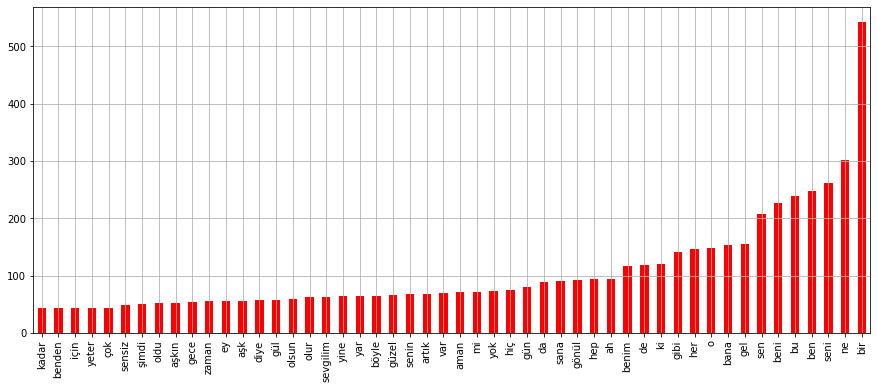

In [18]:
plt.figure(figsize=(15,6))
pd.Series(' '.join(df['lyric']).split()).value_counts().sort_values()[-50:].plot.bar(color="r")
plt.grid()

In [19]:
df.head()

,name,lyric
0,a-fadimem,a fadimem hadi senle kaçalım beyce de pazarınd...
1,acaba,bilmem ki unuttun mu dudakların adımı gözler...
3,acilara-gucendim,bana derdi çektiren göz yaşlarımı döktüren hay...
4,acik-birak-pencereni,açık bırak pencereni örtme perdeyi bu gece san...
5,acilan-bir-gul-gibi,açılan bir gül gibi gir kalbe gönül gibi coşar...


In [20]:
tf1 = (df["lyric"]).apply(lambda x: 
                             pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [21]:
tf1.columns = ["words","tf"]

In [22]:
tf1[tf1.tf>100]

,words,tf
3,,1459.0
7,de,119.0
8,benim,117.0
24,o,149.0
36,bir,542.0
45,ki,120.0
73,bana,154.0
80,ben,247.0
86,bu,239.0
119,gibi,141.0


In [23]:
with open("zeki_muren.txt","w") as file:
    for i in df.lyric:
        file.write(i +'\n')

In [24]:
data_txt = open('zeki_muren.txt').read()

In [25]:
data_txt[:100]

'a fadimem hadi senle kaçalım beyce de pazarında dükkan açalım  ay laylilam ay laylilam ay laylam  a '

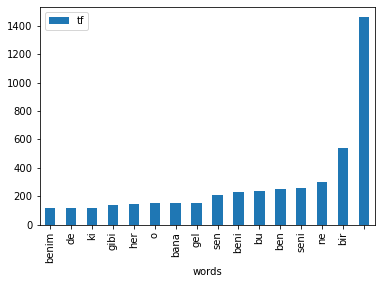

In [26]:
tf1[tf1.tf>100].sort_values(by="tf").plot.bar(x = "words", y = "tf");

In [27]:
tokenizer = Tokenizer()
corpus = data_txt.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [28]:
corpus

['a fadimem hadi senle kaçalım beyce de pazarında dükkan açalım  ay laylilam ay laylilam ay laylam  a fadimem iki değil üç değil benim bağrım demir değil tunç değil  ay laylilam ay laylilam ay laylam ',
 'bilmem ki unuttun mu  dudakların adımı  gözlerinde anılar  eskidi mi acaba o en güzel ümitler o en güzel hayaller yılların gölgesinde kayboldu mu acaba  oysa hala duruyor  ağaçlarda ismimiz oysa hala solmadı  duvarlarda resmimiz bir zamanlar eşsiz olan en kutsal sevgimiz yoksa senin kalbinden  silindi mi acaba  ',
 'bana derdi çektiren göz yaşlarımı döktüren hayatıma küstüren acılara gücendim  yiğidimi solduran ömrüme dert dolduran saçlarımı yolduran acılara gücendim  karşıma geçip gülen tatlı uykumu bölen yaşamayı çok gören acılara gücendim  ben ağladıkça gülen tatlı uykumu bölen ',
 'açık bırak pencereni örtme perdeyi bu gece sana yazdım bu şarkıyı sana yaptım bu besteyi rüzgarlar rüzgarlar getiren bizi aç artık avuçlarını yum gözlerini iyice ağlayıp yalvarmak için diz çöküp yalvarm

In [29]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)



In [30]:


model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(predictors, label, epochs=150, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 229, 100)          674400    
_________________________________________________________________
bidirectional (Bidirectional (None, 229, 400)          481600    
_________________________________________________________________
dropout (Dropout)            (None, 229, 400)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 3372)              340572    
_________________________________________________________________
dense_1 (Dense)              (None, 6744)              22747512  
Total params: 24,444,484
Trainable params: 24,444,484
Non-trainable params: 0
____________________________________________

Text(0.5, 1.0, 'Training accuracy')

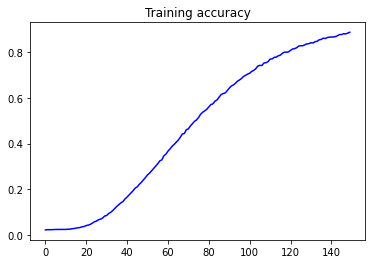

In [31]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

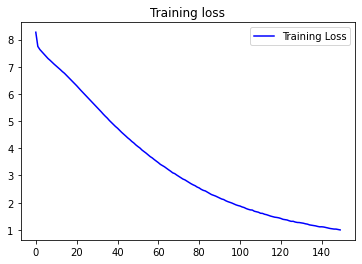

In [32]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()



In [33]:
seed_text = "gitme sana muhtacım"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

gitme sana muhtacım gözümde yolcusu loy bilhassa unutmak seni geçti yaz unuttun sesimde oldu kimse gürcü senden gözünden sakladım göz yaşlarımı döktüren hayatıma küstüren acılara gücendim yiğidimi solduran ömrüme dert dolduran saçlarımı yolduran acılara gücendim karşıma geçip gülen tatlı uykumu bölen yaşamayı çok isterdim dizine yatıpta uyurdum anne dilimde dua gözümde rüyasın seni çok istedim bak kalsın benden ne istemiştin nede ben böyle senmisin şansız kul benmiyim söyle suç bendeymiş gibi hiç bakma öyle beni bu hallere kader getirdi gün olur tersine dönerse çarkım elini elime uzatma sakın ister uzakta ol ister çok sevmiştim seni ne çok iyidir mecnunun hali yalansa boynuma aşkın
